<a href="https://colab.research.google.com/github/e-lprunier/Notebook_4A/blob/main/notebook_stats_LP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
nba_data <- read.csv("/content/nba.csv")

In [ ]:
head(nba_data)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,⋯,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,X...
,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Aaron Gordon,ORL,23,78,40,38,33.8,16.0,6.0,13.4,⋯,7.4,3.7,2.1,0.7,0.7,2.2,32.6,19,0,1.4
2,Aaron Holiday,IND,22,50,31,19,12.9,5.9,2.1,5.2,⋯,1.3,1.7,0.8,0.4,0.3,1.4,11.3,0,0,2.0
3,Abdel Nader,OKC,25,61,38,23,11.4,4.0,1.5,3.5,⋯,1.9,0.3,0.4,0.3,0.2,1.1,7.9,0,0,-2.5
4,Al Horford,BOS,32,68,41,27,29.0,13.6,5.7,10.6,⋯,6.7,4.2,1.5,0.9,1.3,1.9,32.8,10,1,3.8
5,Al-Farouq Aminu,POR,28,81,52,29,28.3,9.4,3.2,7.3,⋯,7.5,1.3,0.9,0.8,0.4,1.8,23.2,12,0,4.7
6,Alan Williams,BKN,26,5,1,4,5.1,3.6,1.6,2.6,⋯,3.8,0.6,0.2,0.2,0.0,0.4,9.5,0,0,3.2


In [ ]:
# Charger les bibliothèques nécessaires
install.packages("corrplot")
install.packages("Hmisc")
install.packages("ggcorrplot")
install.packages("stats")
install.packages("tidyverse")
install.packages("corrr")
library(tidyverse)
library(corrr)  # Pour la visualisation des corrélations
library(stats)
library(ggcorrplot)
library(corrplot)
library(Hmisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



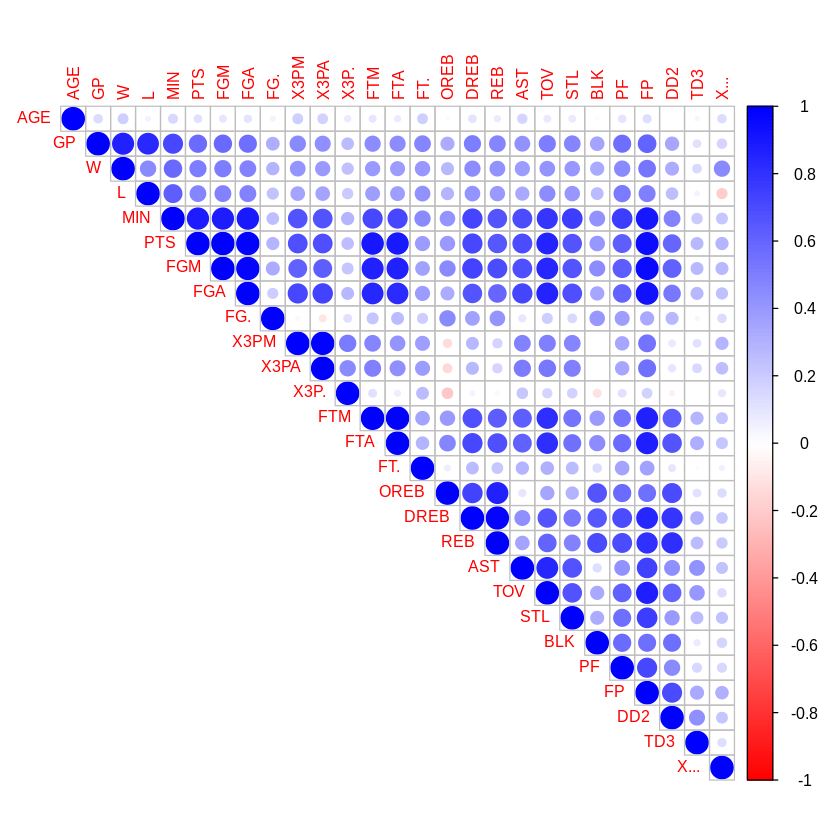

In [ ]:
# Charger les librairies nécessaires
library(tidyverse)
library(corrplot)

# Sélectionner uniquement les colonnes numériques du jeu de données
nba_numeric <- nba_data %>% select(where(is.numeric))

# Calculer la matrice de corrélation
cor_matrix <- cor(nba_numeric, use = "complete.obs")

# Afficher la matrice de corrélation sans les chiffres sur les points
corrplot(cor_matrix, method = "circle", type = "upper", tl.cex = 0.8,
         col = colorRampPalette(c("red", "white", "blue"))(200),
         addCoef.col = NULL)  # Pas d'affichage des coefficients



4.2 Tukey HSD

In [ ]:
# Charger les librairies nécessaires
library(tidyverse)
install.packages("multcomp")
library(multcomp)
library(ggplot2)
install.packages("car")
library(car)  # Pour les tests d'ANOVA
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [ ]:
# Charger le jeu de données cholesterol
data("cholesterol")

In [ ]:
summary(cholesterol)

     trt        response     
 1time :10   Min.   : 2.304  
 2times:10   1st Qu.: 8.409  
 4times:10   Median :12.605  
 drugD :10   Mean   :12.738  
 drugE :10   3rd Qu.:17.519  
             Max.   :27.244  

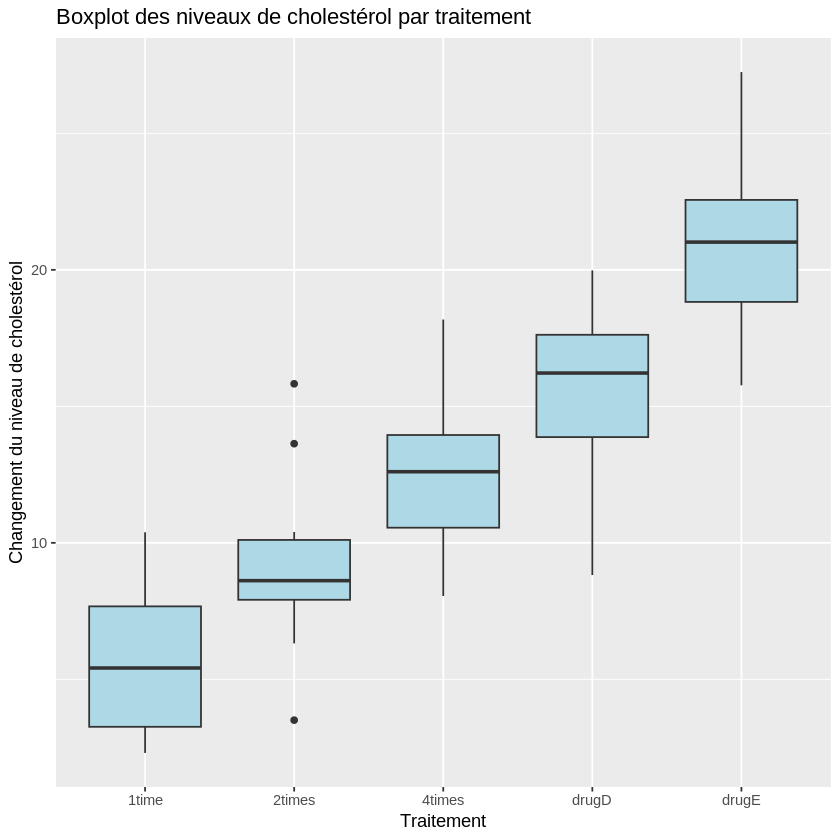

In [ ]:
# Boxplot des niveaux de cholestérol pour les 5 traitements
ggplot(cholesterol, aes(x = trt, y = response)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot des niveaux de cholestérol par traitement",
       x = "Traitement",
       y = "Changement du niveau de cholestérol")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



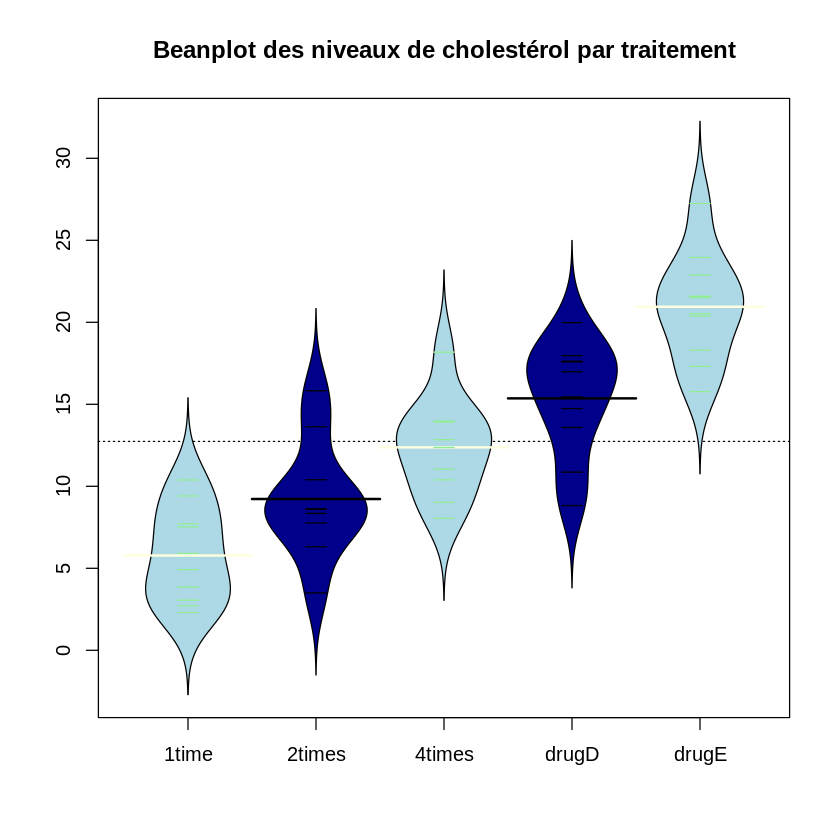

In [ ]:
# Installer et charger la librairie beanplot si nécessaire
install.packages("beanplot")  # Si non installé
library(beanplot)

# Définir un vecteur de couleurs, une couleur pour chaque traitement
couleurs <- c("lightblue", "lightgreen", "lightpink", "lightyellow", "lightcoral")

# Beanplot avec des couleurs différentes pour chaque niveau de traitement
beanplot(response ~ trt, data = cholesterol,
         col = list(couleurs, border = "darkblue"),  # Appliquer les couleurs différentes
         main = "Beanplot des niveaux de cholestérol par traitement")


In [ ]:
# Vérifier si le design est équilibré
table(cholesterol$trt)



 1time 2times 4times  drugD  drugE 
    10     10     10     10     10 

In [ ]:
# Effectuer une ANOVA
anova_model <- aov(response ~ trt, data = cholesterol)

# Résultats de l'ANOVA
summary(anova_model)


            Df Sum Sq Mean Sq F value   Pr(>F)    
trt          4 1351.4   337.8   32.43 9.82e-13 ***
Residuals   45  468.8    10.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] 19 38

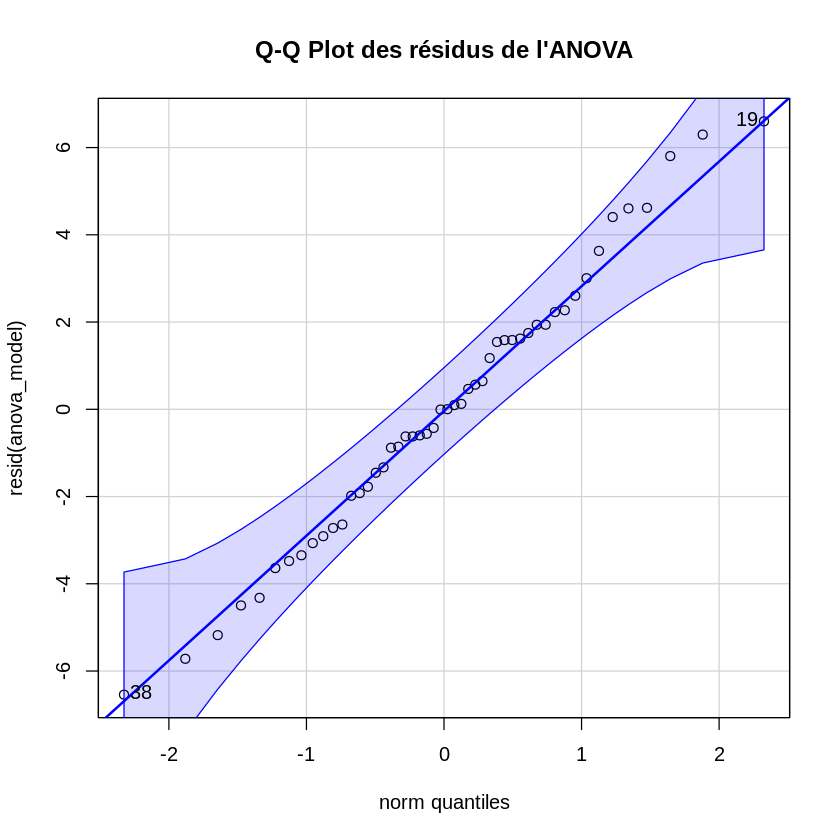

In [ ]:
# Afficher la distribution des résidus de l'ANOVA pour vérifier la normalité
qqPlot(resid(anova_model), main = "Q-Q Plot des résidus de l'ANOVA")


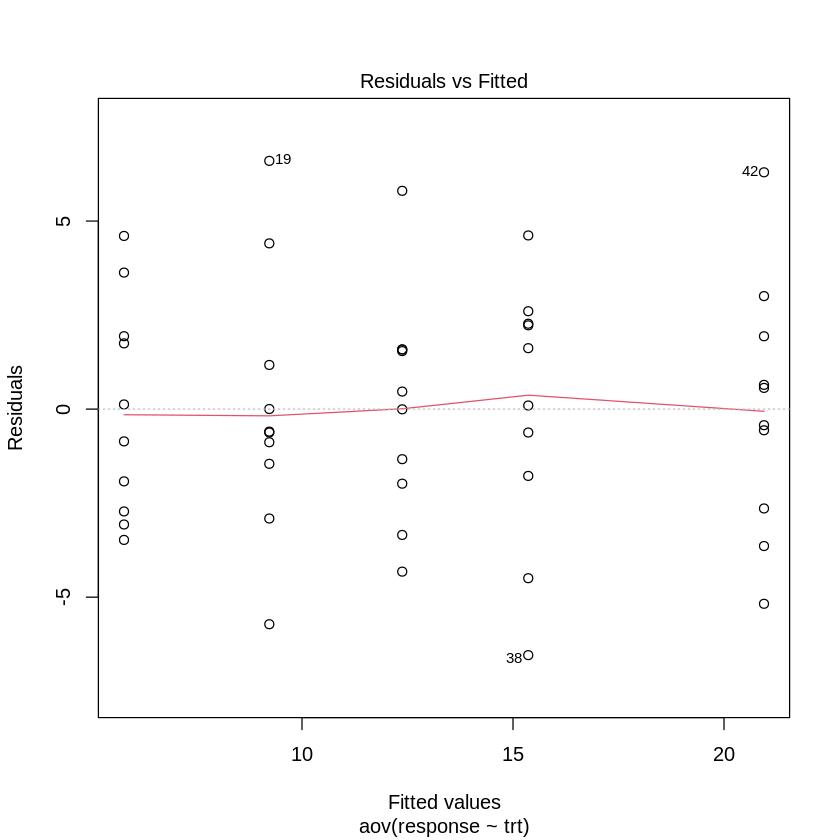

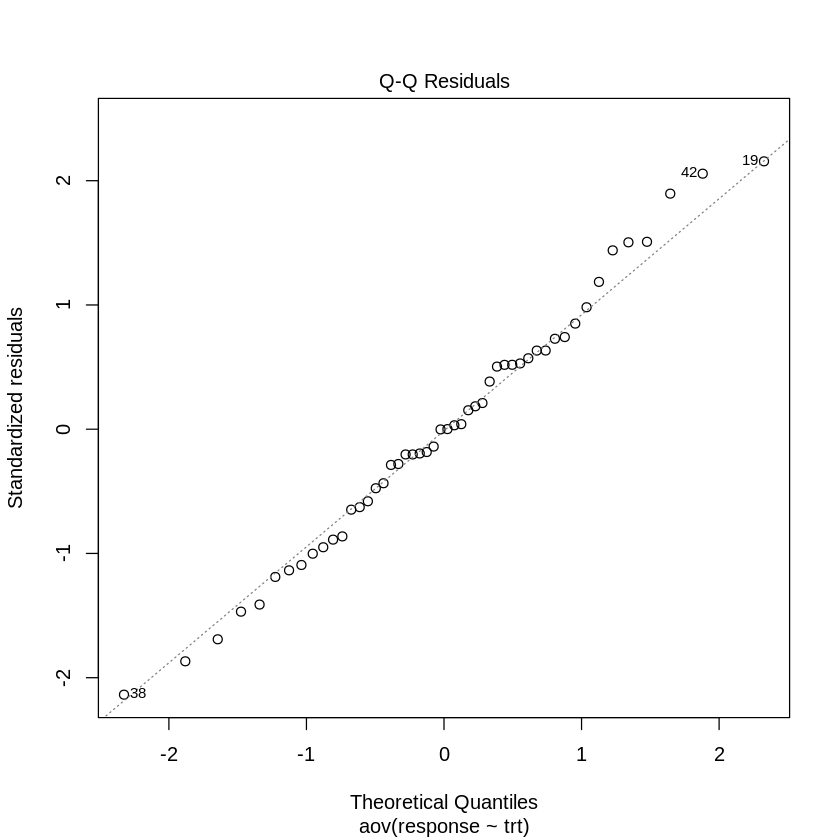

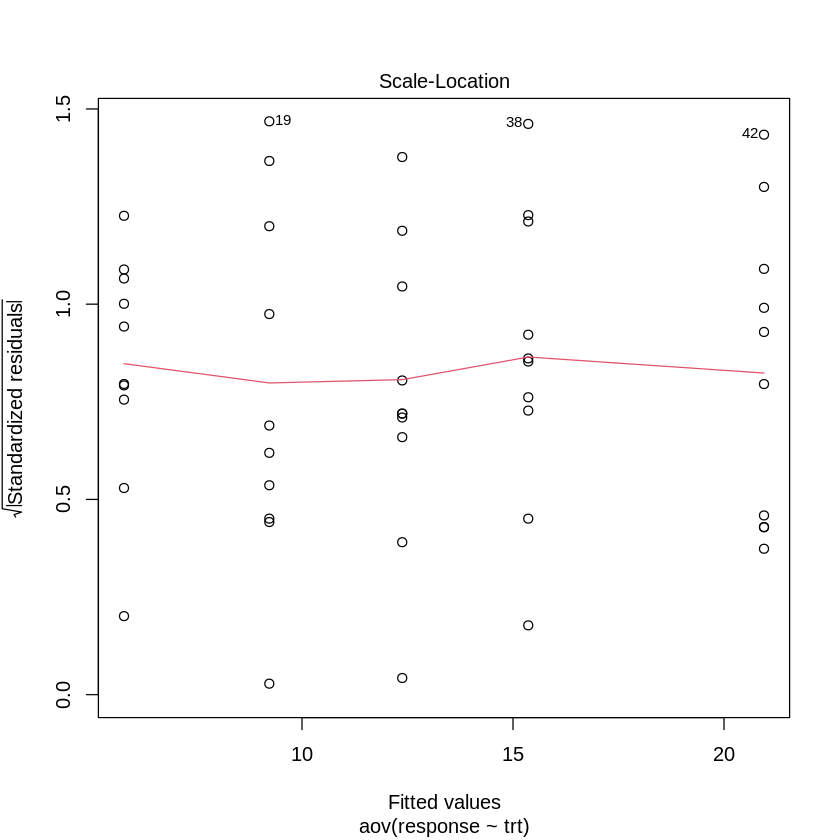

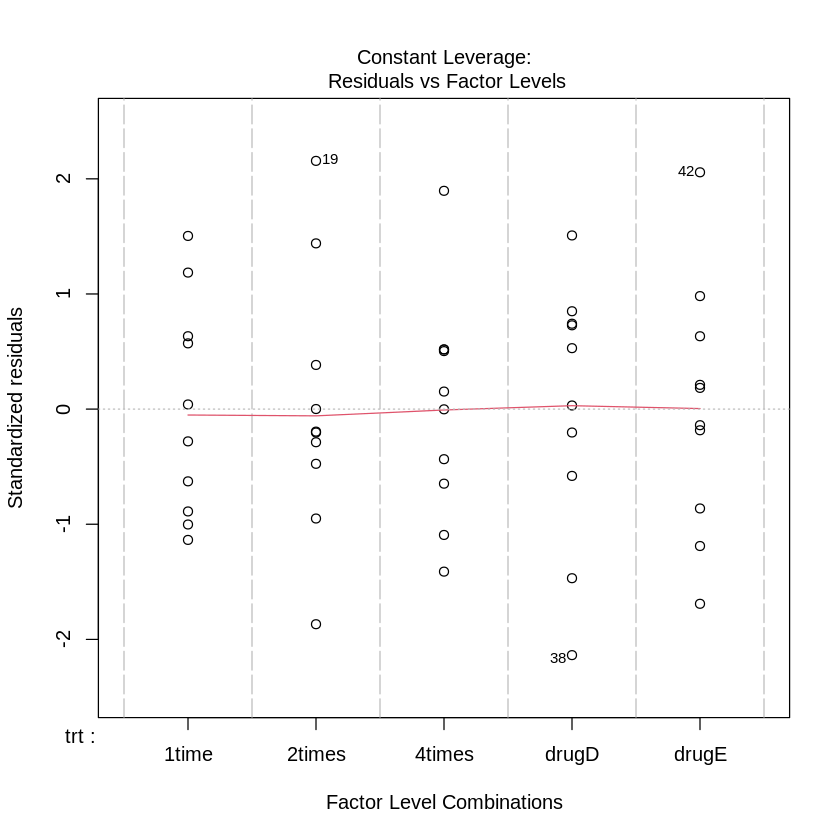

In [ ]:
plot(anova_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = response ~ trt, data = cholesterol)

$trt
                  diff        lwr       upr     p adj
2times-1time   3.44300 -0.6582817  7.544282 0.1380949
4times-1time   6.59281  2.4915283 10.694092 0.0003542
drugD-1time    9.57920  5.4779183 13.680482 0.0000003
drugE-1time   15.16555 11.0642683 19.266832 0.0000000
4times-2times  3.14981 -0.9514717  7.251092 0.2050382
drugD-2times   6.13620  2.0349183 10.237482 0.0009611
drugE-2times  11.72255  7.6212683 15.823832 0.0000000
drugD-4times   2.98639 -1.1148917  7.087672 0.2512446
drugE-4times   8.57274  4.4714583 12.674022 0.0000037
drugE-drugD    5.58635  1.4850683  9.687632 0.0030633



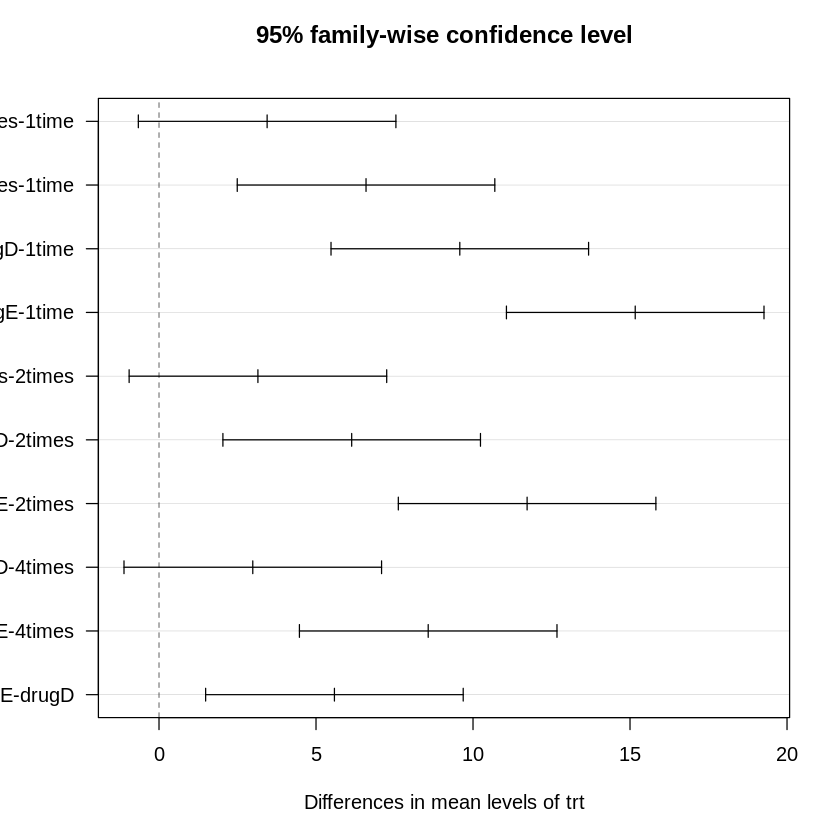

In [ ]:
# Effectuer le test Tukey HSD
tukey_result <- TukeyHSD(anova_model)

# Afficher les résultats du test Tukey
print(tukey_result)

# Visualiser les résultats du test Tukey
plot(tukey_result, las = 1)


In [ ]:
# Installer le package 'perm' si nécessaire
install.packages("perm")
library(perm)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Effectuer un test ANOVA de permutation
set.seed(123)  # Pour rendre le test reproductible

# Utiliser la fonction perm.anova pour effectuer un test de permutation sur le modèle ANOVA
permutation_test <- perm.anova(response ~ trt, data = cholesterol, nperm = 1000)

# Résultats du test de permutation
print(permutation_test)


ERROR: Error in perm.anova(response ~ trt, data = cholesterol, nperm = 1000): could not find function "perm.anova"


In [ ]:
# Résultats de l'ANOVA classique
anova_model <- aov(response ~ trt, data = cholesterol)
summary(anova_model)

# Comparer les valeurs p
p_value_anova <- summary(anova_model)[[1]]["Pr(>F)"][1]
p_value_permutation <- permutation_test$p.value

cat("Valeur p du test ANOVA paramétrique:", p_value_anova, "\n")
cat("Valeur p du test de permutation:", p_value_permutation, "\n")


            Df Sum Sq Mean Sq F value   Pr(>F)    
trt          4 1351.4   337.8   32.43 9.82e-13 ***
Residuals   45  468.8    10.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ERROR: Error: object 'permutation_test' not found
